In [1]:
import torch
import numpy as np
from torch.utils.data import DataLoader
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from lib.tfno import FNO1d
from lib.utils import relative_l2_error
from lib.dataset import PDEDataset

In [2]:
sns.set_context("paper")
sns.set_style("whitegrid")

In [3]:
modes = 16
width = 64
layers = 4
fno = FNO1d(modes, width, layers)  # model

# load model weights
fno.load_state_dict(torch.load("models/tfno_model.pth", weights_only=True, map_location=torch.device('cpu')))

<All keys matched successfully>

/Users/ben/University/AISE/projects/FNO (Wave Equation)/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ben/University/AISE/projects/FNO (Wave Equation)/.venv/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/Users/ben/University/AISE/projects/FNO (Wave Equation)/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ben/University/AISE/projects/FNO (Wave Equation)/.venv/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/Users/ben/University/AISE/projects/FNO (Wave Equation)/.venv/lib/python3.12/site-pa

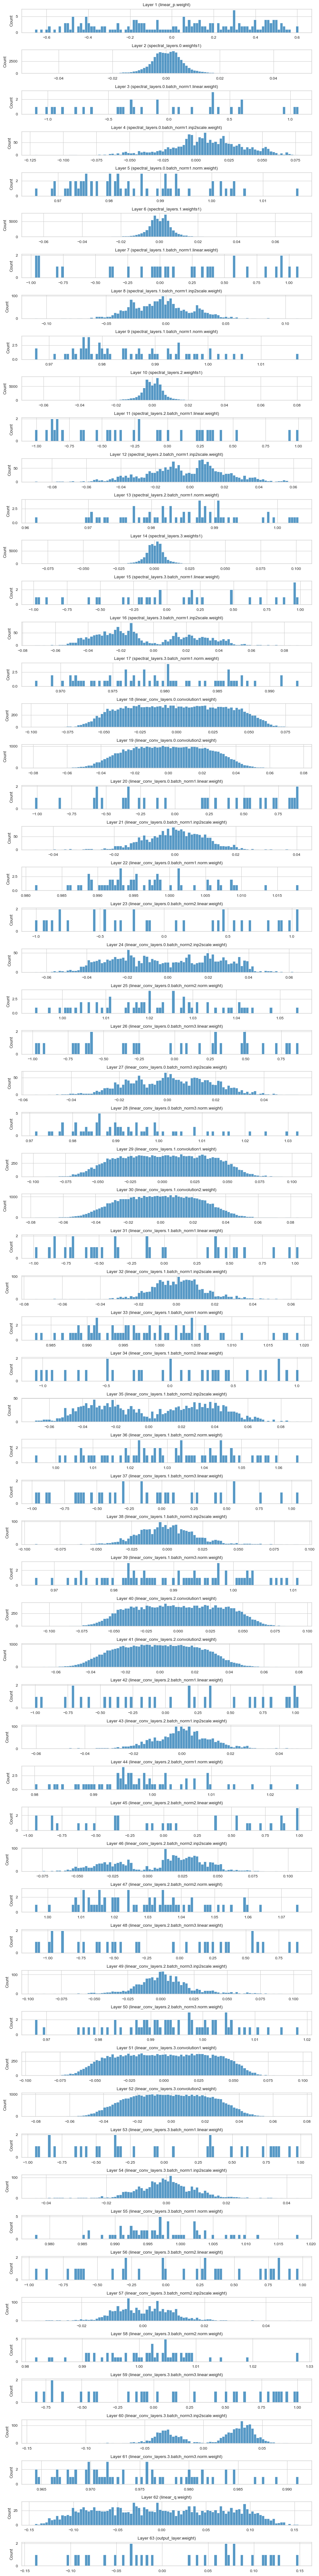

In [4]:
weights = []
names = []
for name, param in fno.named_parameters():
    # print(param)
    if "bias" in name:
        continue
    weights.append(param.data.numpy().flatten())
    names.append(name)

# for w in weights:
#     print(w.shape)


fig, axs = plt.subplots(len(weights), 1, figsize=(10, 80))
for i, w in enumerate(weights):
    sns.histplot(w, bins=100, ax=axs[i])
    axs[i].set_title(f"Layer {i+1} ({names[i]})")

plt.tight_layout()